### **Тақырыптар:** KNN, SVM, Наивті Байес, Шешім ағаштары және Кластерлеу.

**Тапсырманың мақсаты:**

1.  `sklearn` кітапханасынан "Breast Cancer" (Сүт безі қатерлі ісігі) деректер жиынын жүктеу.
2.  Деректерді талдау және масштабтау.
3.  Берілген классификациялық алгоритмдердің (KNN, SVM, NB, Decision Tree) ішінен **тек біреуін таңдап**, модельді үйрету.
4.  Модельдің нәтижелерін (дәлдігін) тексеру.
5.  Қосымша: Деректерді кластерлеу (K-Means).

In [1]:
# Қажетті кітапханаларды импорттау
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Деректер жиыны
from sklearn.datasets import load_breast_cancer

# Деректерді өңдеуге арналған құралдар
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Классификациялық модельдер (Студент осылардың біреуін таңдайды)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Кластерлеу моделі
from sklearn.cluster import KMeans

# Бағалау метрикалары
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 1-қадам: Деректерді жүктеу және шолу

Біз сүт безі қатерлі ісігін анықтауға арналған классикалық датасетті қолданамыз.

**Тапсырма:**

  * Деректерді жүктеп, оның құрылымымен танысыңыз.


In [2]:
# Деректерді жүктеу
data = load_breast_cancer()

# DataFrame құру
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Деректер жиынының алғашқы 5 жолын шығару
print(df.head())

# Деректер жиынының өлшемін (жолдар мен бағаналар санын) шығару
print(df.shape)

# Жетіспейтін мәндердің бар-жоғын тексеру
print(df.isnull().sum())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## 2-қадам: Деректерді алдын ала өңдеу (Preprocessing)

Модель сапалы жұмыс істеуі үшін деректерді жаттығу және тест жиындарына бөліп, оларды бір өлшемге (scale) келтіру қажет.



In [3]:
# Белгілер (X) мен нысаналы айнымалыны (y) бөлу
X = df.drop('target', axis=1)
y = df['target']

# Деректерді жаттығу (80%) және тест (20%) жиындарына бөліңіз (random_state=42 қолданыңыз)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартты масштабтау (StandardScaler)
# Бұл әсіресе KNN және SVM алгоритмдері үшін маңызды
scaler = StandardScaler()

# scaler-ді X_train деректеріне үйретіңіз (fit) және түрлендіріңіз (transform)
X_train_scaled = scaler.fit_transform(X_train)

#  X_test деректерін түрлендіріңіз (тек transform)
X_test_scaled = scaler.transform(X_test)

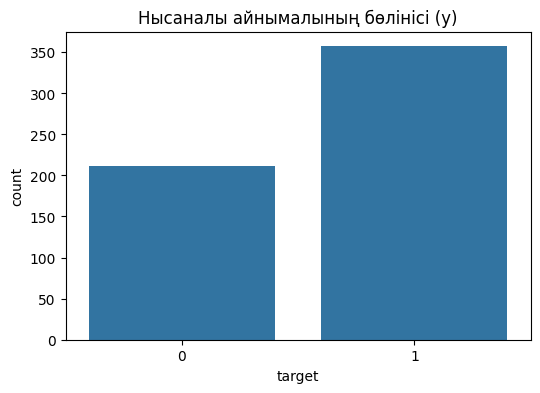

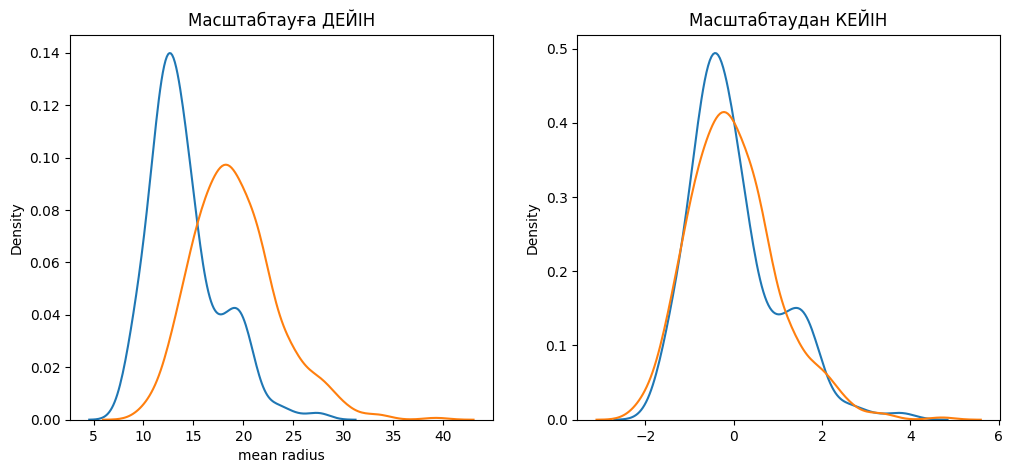

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Нысаналы айнымалының бөлінісі (y)')
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Масштабтауға ДЕЙІН')
sns.kdeplot(X_train.iloc[:, 0], ax=ax1) 
sns.kdeplot(X_train.iloc[:, 1], ax=ax1) 

ax2.set_title('Масштабтаудан КЕЙІН')
sns.kdeplot(X_train_scaled[:, 0], ax=ax2)
sns.kdeplot(X_train_scaled[:, 1], ax=ax2)

plt.show()

## 3-қадам: Классификациялық модельді құру және оқыту

**Негізгі Тапсырма:**
Төмендегі тізімнен **тек бір** алгоритмді таңдап, сол модельді құрыңыз және оқытыңыз:

1.  `KNeighborsClassifier` (KNN)
2.  `SVC` (Support Vector Machine)
3.  `GaussianNB` (Naive Bayes)
4.  `DecisionTreeClassifier` (Шешім ағашы)


In [17]:
model = SVC(kernel='rbf', C = 100, gamma=0.01)

if model is not None:
    # Модельді жаттығу деректерімен (X_train_scaled, y_train) оқыту
    model.fit(X_train_scaled, y_train)

    # Тест деректеріне (X_test_scaled) болжам жасау
    y_pred = model.predict(X_test_scaled)

    print("Модель сәтті оқытылды және болжам жасалды.")
else:
    print("Қате: Модель таңдалмады. Кодты толықтырыңыз.")

Модель сәтті оқытылды және болжам жасалды.


## 4-қадам: Модельді бағалау

Таңдаған модельіңіз қаншалықты дұрыс жұмыс істегенін тексеріңіз.


In [18]:
if model is not None:
    # Дәлдікті (Accuracy) есептеу
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Модельдің дәлдігі: {accuracy:.4f}")

    # Толық классификациялық есеп
    print("\nКлассификациялық есеп (Classification Report):")
    print(classification_report(y_test, y_pred))

    # Шатасу матрицасы (Confusion Matrix)
    print("\nШатасу матрицасы:")
    print(confusion_matrix(y_test, y_pred))
else:
    print("Модель құрылмағандықтан, нәтиже жоқ.")

Модельдің дәлдігі: 0.9561

Классификациялық есеп (Classification Report):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Шатасу матрицасы:
[[41  2]
 [ 3 68]]


## 5-қадам: Кластерлеу (Қосымша тапсырма)

Мұнда біз мұғалімсіз оқыту (unsupervised learning) әдісін қолданамыз. `target` жауаптарын қолданбай, деректердің өзін топтастырып көреміз.

**Тапсырма:** `KMeans` алгоритмін қолданып, деректерді 2 кластерге бөліңіз.


In [19]:
# K-Means моделін құру (2 кластер)
kmeans = KMeans(n_clusters=2, random_state=42)

# Модельді бастапқы X деректеріне (target-сіз) оқыту
kmeans.fit(X)

# Кластер орталықтарын алу
centers = kmeans.cluster_centers_

# Болжанған кластер нөмірлерін алу
labels = kmeans.labels_

print("Кластерлеу аяқталды.")
print(f"Табылған кластер орталықтарының саны: {len(centers)}")

Кластерлеу аяқталды.
Табылған кластер орталықтарының саны: 2


## Қорытынды

- Қай алгоритм ең жақсы нәтиже көрсетті? Неге?
- Модель сапасын қалай көтеруге болады?